# Task 3: Data Analysis

## Dataset Loading

We load the dataset from [here](https://eur01.safelinks.protection.outlook.com/?url=https%3A%2F%2Fhuggingface.co%2Fdatasets%2Fallenai%2FWildChat-1M&data=05%7C02%7Cgopika.premsankar%40aalto.fi%7C93206d0f10554ff0997008de1dd0608e%7Cae1a772440414462a6dc538cb199707e%7C1%7C0%7C638980978001437002%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=TwhmInXl3hSHO0SB7c7%2Bi2RB9yrXmfQrnZAsjgoNhWg%3D&reserved=0), and import all the necessary libraries.

In [92]:
# load the dataset
from datasets import load_dataset, Dataset
import matplotlib.pyplot as plt
import numpy as np
import tiktoken
from collections import defaultdict

ds = load_dataset("allenai/WildChat-1M")
ds

DatasetDict({
    train: Dataset({
        features: ['conversation_hash', 'model', 'timestamp', 'conversation', 'turn', 'language', 'openai_moderation', 'detoxify_moderation', 'toxic', 'redacted', 'state', 'country', 'hashed_ip', 'header'],
        num_rows: 837989
    })
})

In [93]:
# remove "train" label and keep only its contents
ds = ds['train']
ds

Dataset({
    features: ['conversation_hash', 'model', 'timestamp', 'conversation', 'turn', 'language', 'openai_moderation', 'detoxify_moderation', 'toxic', 'redacted', 'state', 'country', 'hashed_ip', 'header'],
    num_rows: 837989
})

***

## Encoding Check

Firstly, we will check the encoding used for all available models in the dataset. While this step could be done after we filter the country, it does not matter since all models use the same encoding.

In [94]:
# for every available model in the entire dataset we should check the encoding used
for model in ds.unique('model'):
    print(tiktoken.encoding_for_model(model))

<Encoding 'cl100k_base'>
<Encoding 'cl100k_base'>
<Encoding 'cl100k_base'>
<Encoding 'cl100k_base'>
<Encoding 'cl100k_base'>
<Encoding 'cl100k_base'>
<Encoding 'cl100k_base'>


In [95]:
# we set the encoder to "cl100k_base"
enc = tiktoken.get_encoding("cl100k_base")

***

## Column Removal

In [96]:
# now we remove redundant rows to save space
ds = ds.remove_columns([
    "conversation_hash",
    "language",
    "openai_moderation",
    "detoxify_moderation",
    "toxic",
    "redacted",
    "state",
    "hashed_ip",
    "header",
    "turn",
    "model"
])

In [97]:
ds

Dataset({
    features: ['timestamp', 'conversation', 'country'],
    num_rows: 837989
})

***

## Country Duplicate Check

In [98]:
# we check the countries to make sure no duplicates (e.g US and USA or United States) are existant
list_of_countries = ds.unique("country")
list_of_countries = [x for x in list_of_countries if x is not None]
list_of_countries.sort()
list_of_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire, Sint Eustatius, and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo Republic',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',

***

## Filter Dataset Based On Country

It is preferable to work with a smaller dataset so the rest of the preprocessing steps will be applied on each country required.

In [128]:
# all the other preprocessing steps will be applied only on the specific country dataset split
country = "China" # could be Germany, US, or China

country_ds = ds.filter(lambda x: x['country'] == country).remove_columns(['country'])
country_ds

Filter:   0%|          | 0/837989 [00:00<?, ? examples/s]

Dataset({
    features: ['timestamp', 'conversation'],
    num_rows: 101156
})

In [129]:
# checking a specific entry to the newly created dataset
country_ds[0]

{'timestamp': datetime.datetime(2023, 4, 9, 0, 35, 47, tzinfo=<UTC>),
 'conversation': [{'content': '如何做好人力资源工作',
   'country': 'China',
   'hashed_ip': '6535c12ae77b83955d33124f66913def0770cf5417628a09de9803f571e82670',
   'header': {'accept-language': 'zh-CN,zh-Hans;q=0.9',
    'user-agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 MicroMessenger/8.0.34(0x18002230) NetType/WIFI Language/zh_CN'},
   'language': 'Chinese',
   'redacted': False,
   'role': 'user',
   'state': 'Fujian',
   'timestamp': None,
   'toxic': False,
   'turn_identifier': 101114},
  {'content': '做好人力资源工作需要遵循以下几个方面的原则和方法：\n\n1. 设立明确的人力资源管理目标和政策：建立以员工为核心的企业文化，确立人力资源工作的长期目标、中期目标和近期目标。\n\n2. 建立和完善人力资源管理体系：包括人事制度、培训制度、薪酬制度、绩效考核制度、员工关系管理制度等，确保各项制度的顺畅运作。\n\n3. 招聘优秀人才：通过有效的招聘渠道吸引优秀人才，确保岗位与员工能力的匹配度，并针对企业发展需要预留潜力人才。\n\n4. 人员培训与发展：根据员工的职业生涯发展，制定个性化培训计划，提升员工的技能和综合素质；同时充分挖掘和开发员工的潜能，提供相应的晋升和发展空间。\n\n5. 建立公平、合理的薪酬激励制度：通过充分调查和分析，确立与市场水平相符合的薪酬标准，充分激发员工的工作积极

mention that: If the user turn has no timestamp, we assign the timestamp of the first assistant response.
Since the assistant response is generated immediately after the request, this introduces negligible error in hourly-level aggregation.

***

## Timestamp Assumption and Fix

We notice that for every conversation, the user's part is missing the timestamp feature. However, we assume that the assistant's answer timestamp is always existent and it is generated immediately after the request.

Firstly we will check the assumption that there is always an answer.

In [130]:
def check_conversation(example):
    convo = example["conversation"]
    valid = True
    
    # check if the last message is from user
    if convo[-1]["role"] == "user":
        valid = False
    else:
        #  check every user message has a following assistant response
        for i, msg in enumerate(convo):
            if msg["role"] == "user":
                # look for next assistant message
                has_response = any(
                    later["role"] == "assistant" for later in convo[i+1:]
                )
                if not has_response:
                    valid = False
                    break
                    
    example["has_full_response"] = valid
    return example

country_ds_checked = country_ds.map(check_conversation)

Map:   0%|          | 0/101156 [00:00<?, ? examples/s]

In [131]:
country_ds_checked.filter(lambda x: x["has_full_response"] == False).num_rows

Filter:   0%|          | 0/101156 [00:00<?, ? examples/s]

0

So the assumption was correct, now we will pass the assistant's answer timestamp to the user's request.

In [132]:
def propagate_timestamps(example):
    convo = example["conversation"]

    for i, msg in enumerate(convo):
        # if there is no timestamp for user, propagate from next assistant
        if msg["role"] == "user" and msg["timestamp"] is None:
            # make sure there is a next message and it is from assistant and timestamp exists
            if i + 1 < len(convo) and convo[i+1]["role"] == "assistant" and convo[i+1]["timestamp"] is not None:
                msg["timestamp"] = convo[i+1]["timestamp"]

        # save back into list
        convo[i] = msg

    example["conversation"] = convo
    return example

country_ds = country_ds.map(propagate_timestamps)

Map:   0%|          | 0/101156 [00:00<?, ? examples/s]

In conclusion, this approach assumes: That every user request does eventually get an assistant response and the assistant response timestamp is the closest possible approximation of when the user message arrived.

***

## Separate Roles

Since each row contains answers and requests, we will split the rows and create a new column (assistant/user) to separate the role.

In [133]:
# we will now generate a new dataset containing each message from a conversation
def row_generator():
    for example in country_ds:
        for msg in example["conversation"]:
            yield {
                "timestamp": msg["timestamp"],
                "content": msg["content"],
                "role": msg["role"],
            }

flattened = Dataset.from_generator(row_generator)

Generating train split: 0 examples [00:00, ? examples/s]

In [134]:
# checking the newly created dataset
flattened

Dataset({
    features: ['timestamp', 'content', 'role'],
    num_rows: 514654
})

In [135]:
# checking the first 4 entries
flattened[:4]

{'timestamp': [datetime.datetime(2023, 4, 9, 0, 35, 47, tzinfo=<UTC>),
  datetime.datetime(2023, 4, 9, 0, 35, 47, tzinfo=<UTC>),
  datetime.datetime(2023, 4, 9, 0, 53, 41, tzinfo=<UTC>),
  datetime.datetime(2023, 4, 9, 0, 53, 41, tzinfo=<UTC>)],
 'content': ['如何做好人力资源工作',
  '做好人力资源工作需要遵循以下几个方面的原则和方法：\n\n1. 设立明确的人力资源管理目标和政策：建立以员工为核心的企业文化，确立人力资源工作的长期目标、中期目标和近期目标。\n\n2. 建立和完善人力资源管理体系：包括人事制度、培训制度、薪酬制度、绩效考核制度、员工关系管理制度等，确保各项制度的顺畅运作。\n\n3. 招聘优秀人才：通过有效的招聘渠道吸引优秀人才，确保岗位与员工能力的匹配度，并针对企业发展需要预留潜力人才。\n\n4. 人员培训与发展：根据员工的职业生涯发展，制定个性化培训计划，提升员工的技能和综合素质；同时充分挖掘和开发员工的潜能，提供相应的晋升和发展空间。\n\n5. 建立公平、合理的薪酬激励制度：通过充分调查和分析，确立与市场水平相符合的薪酬标准，充分激发员工的工作积极性和创新能力。\n\n6. 绩效管理：通过设定明确的绩效指标，客观评价员工工作成果，对优秀员工给予充分的奖励与激励，对表现不佳的员工加以警示和改进指导。\n\n7. 员工关系管理：建立有效的沟通机制，了解员工需求，解决与员工之间的矛盾和问题，为员工创造和谐的工作氛围，提高员工满意度和凝聚力。\n\n8. 合规与风险管理：遵守国家和地区相关的人力资源管理法律法规，做好企业内部合规风险控制，保障企业和员工的合法权益。\n\n9. 数据化和信息化管理：利用现代化信息技术手段，对人力资源工作的各个环节进行数据化和信息化管理，提高管理效率和综合运营能力。\n\n10. 持续改进与创新：对人力资源管理工作进行持续的跟踪、评估与改进，与时俱进研究探索适合企业的人力资源管理新方法和新思路。',
  '选取图片某一片区域，如左下角，横坐标小于300，纵坐

***

## Tokenize input and output

We now tokenize both input and output and also save the amount of tokens for each request/answer

In [136]:
# given the string in content we produce the tokens, save them in a different column, and also create a column of their amount
def tokenization(example):
    text = example["content"]
    if text is None:
        example["tokens"] = []
        example["amount"] = 0
        return example

    example["tokens"] = enc.encode(text, allowed_special={'<|endoftext|>'})
    example["amount"] = len(example["tokens"])
    return example

flattened = flattened.map(tokenization)

Map:   0%|          | 0/514654 [00:00<?, ? examples/s]

***

## Dictionaries Containing Metrics

Before we assign a day and an hour to each request we first need to make sure all the timezones are the same.

In [137]:
# check that all timezones are the same before sorting
def extract_tz(example):
    return {"tz": str(example["timestamp"].tzinfo)}

tz_dataset = flattened.map(extract_tz)

unique_tz = set(tz_dataset["tz"])
print(unique_tz)

Map:   0%|          | 0/514654 [00:00<?, ? examples/s]

{'UTC'}


Since they are, we can now create 3 different dictionaries to store the amount of requests, input tokens, output tokens, per day and per hour. These are necessary to extract the final metrics.

We basically iterate every row, if the role is 'user' we increment the amount of requests by 1 and increment the amount of tokens for this specific date and hour. If the role is assistant we simply increment the amount of output tokens for this specific day and hour.

In [138]:
# create 3 different dictionaries to store the distributions of requests, input and output tokens.
requests = defaultdict(lambda: defaultdict(int))
input_tokens = defaultdict(lambda: defaultdict(int))
output_tokens = defaultdict(lambda: defaultdict(int))

for row in flattened:
    ts = row["timestamp"]
    date = ts.date().isoformat()
    hour = ts.hour
    if row["role"] == "user":
        requests[date][hour] += 1
        input_tokens[date][hour] += row['amount']
    else:
        output_tokens[date][hour] += row['amount']

We check that the days in all three dictionaries are the same.

In [139]:
sorted(input_tokens.keys()) == sorted(requests.keys()) == sorted(output_tokens.keys())

True

***

## Metrics Calculation

For each one of the 24 hours we create an array containing the distribution of requests/tokens and then we calculate the mean and the std.

In [140]:
hour_stats = {} # will contain metrics for each hour
all_days = sorted(requests.keys()) # same days as input_tokens and output_tokens

for hour in range(24):
    req_counts = [requests[day].get(hour, 0) for day in all_days]
    in_token_counts = [input_tokens[day].get(hour, 0) for day in all_days]
    out_token_counts = [output_tokens[day].get(hour, 0) for day in all_days]
    
    hour_stats[hour] = {
        "requests_mean": np.mean(req_counts),
        "requests_std": np.std(req_counts),
        "input_tokens_mean": np.mean(in_token_counts),
        "input_tokens_std": np.std(in_token_counts),
        "output_tokens_mean": np.mean(out_token_counts),
        "output_tokens_std": np.std(out_token_counts),
    }

***

## Plotting

Firstly we create a plot to check the amount of requests at four distinct hours throughout all days. This allows us to understand how the distributions are expected to come out.

### Requests per day on distinct hours

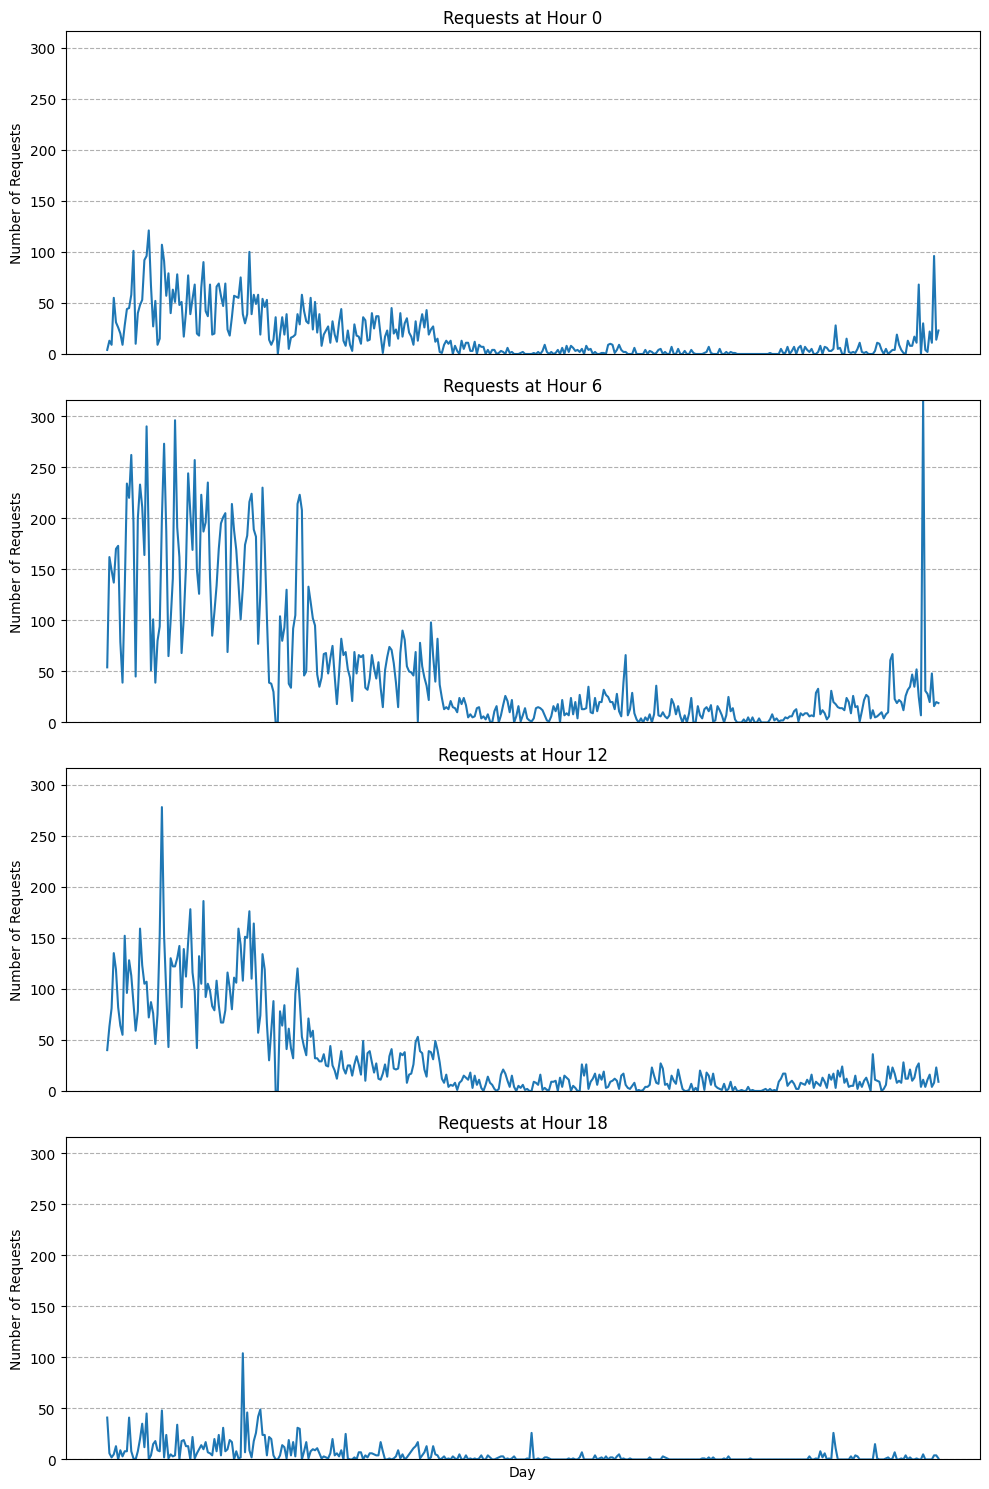

In [141]:
# plot 4 req_counts versus days at hours 0, 6, 12, 18
import matplotlib.pyplot as plt
hours_to_plot = [0, 6, 12, 18]
fig, axs = plt.subplots(len(hours_to_plot), 1, figsize=(10, 15), sharex=True)
for i, hour in enumerate(hours_to_plot):
    requests_counts = [requests[day].get(hour, 0) for day in all_days]
    axs[i].plot(all_days, requests_counts)
    axs[i].set_title(f"Requests at Hour {hour}")
    axs[i].set_ylabel("Number of Requests")
    axs[i].grid(True, axis='y', linestyle='--')
    axs[i].set_xticks([])
    # set y-ticks the same for all plots
    axs[i].set_ylim(0, max(max(requests[day].get(h, 0) for day in all_days) for h in hours_to_plot) + 1)
axs[-1].set_xlabel("Day")
plt.tight_layout()
plt.show()

### Bar plot of requests per hour

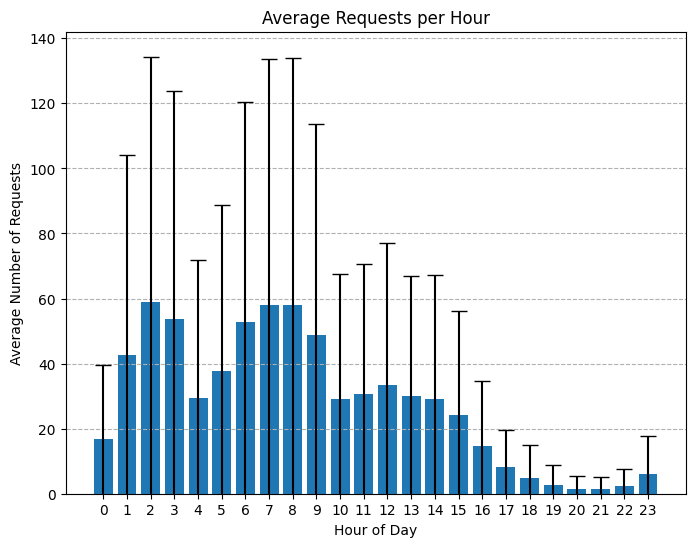

In [142]:
# Plot request distributions as bar charts
import matplotlib.pyplot as plt
hours = list(range(24))
# Since values are positive, the plot should not display values below zero
plt.figure(figsize=(8, 6))
request_means = [hour_stats[hour]["requests_mean"] for hour in hours]
request_stds = [hour_stats[hour]["requests_std"] for hour in hours]
plt.bar(hours, request_means, yerr=request_stds,linewidth = 2, capsize=6)
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Requests")
plt.title("Average Requests per Hour")
plt.xticks(hours)
plt.grid(True, axis='y', linestyle='--')
plt.ylim(bottom=0) # Set y-axis
plt.show()

### Box plot of requests per hour

We also construct a sample boxplot to better understand the above plot

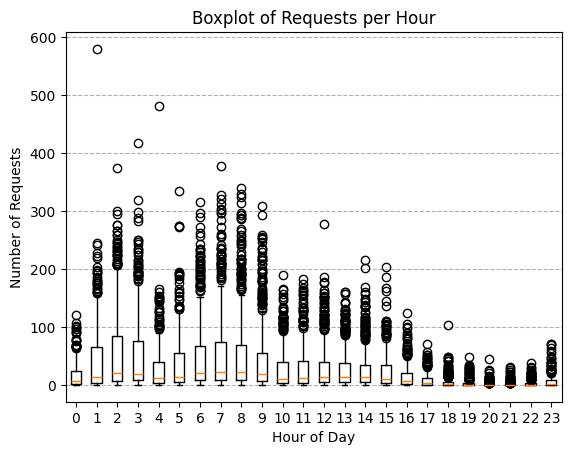

In [143]:
# create boxplot of requests per hour
import matplotlib.pyplot as plt
data = []
for hour in range(24):
    req_counts = [requests[day].get(hour, 0) for day in all_days]
    data.append(req_counts)
plt.boxplot(data, positions=range(24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.title("Boxplot of Requests per Hour")
plt.grid(True, axis='y', linestyle='--')
plt.show()

***

### Bar plot of input tokens per hour

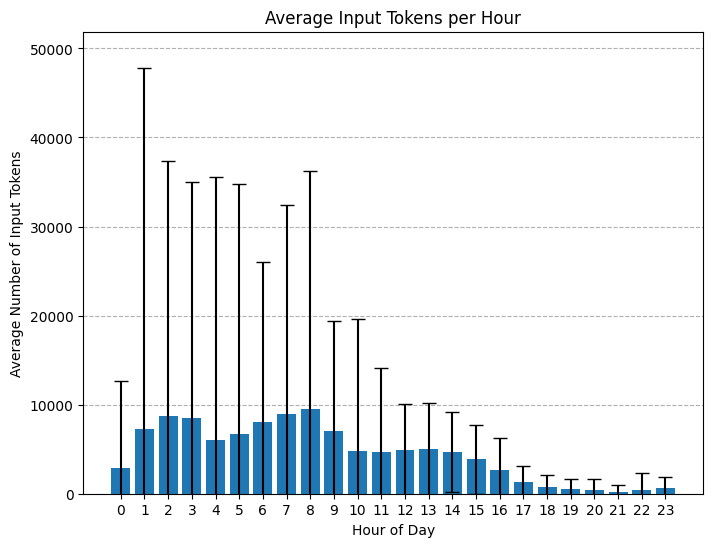

In [144]:
# Plot input tokens distributions as bar charts
hours = list(range(24))
# Since values are positive, the plot should not display values below zero
input_tokens_mean = [hour_stats[hour]["input_tokens_mean"] for hour in hours]
input_tokens_std = [hour_stats[hour]["input_tokens_std"] for hour in hours]
plt.figure(figsize=(8, 6))
plt.bar(hours, input_tokens_mean, yerr=input_tokens_std, capsize=5)
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Input Tokens")
plt.title("Average Input Tokens per Hour")
plt.xticks(hours)
plt.grid(True, axis='y', linestyle='--')
plt.ylim(bottom=0) # Set y-axis
plt.show()

### Boxplot of input tokens per hour

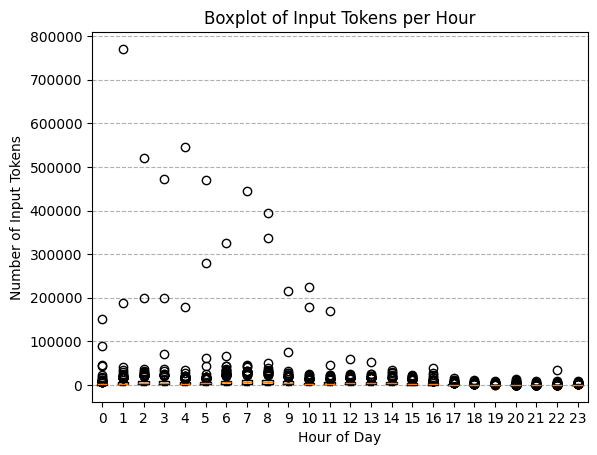

In [145]:
# create boxplot of input tokens per hour
import matplotlib.pyplot as plt
data = []
for hour in range(24):
    input_counts = [input_tokens[day].get(hour, 0) for day in all_days]
    data.append(input_counts)
plt.boxplot(data, positions=range(24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Input Tokens")
plt.title("Boxplot of Input Tokens per Hour")
plt.grid(True, axis='y', linestyle='--')
plt.show()

***

### Bar plot of output tokens per hour

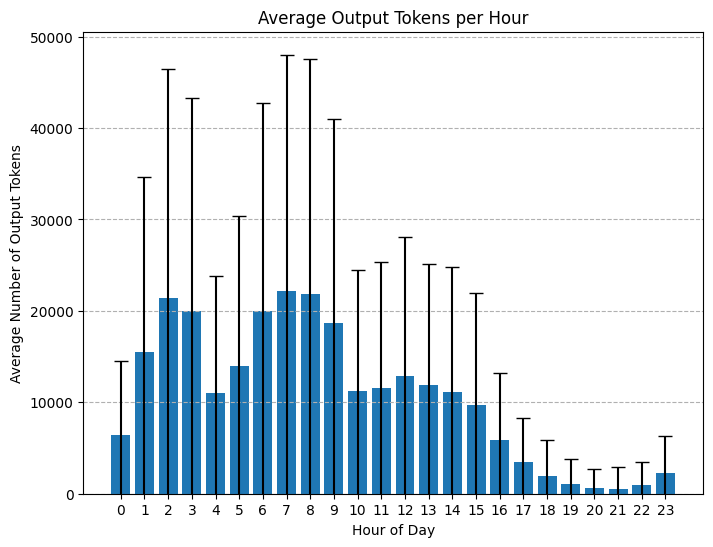

In [146]:
# Plot output tokens distributions as bar charts
hours = list(range(24))
# Since values are positive, the plot should not display values below zero
output_tokens_mean = [hour_stats[hour]["output_tokens_mean"] for hour in hours]
output_tokens_std = [hour_stats[hour]["output_tokens_std"] for hour in hours]
plt.figure(figsize=(8, 6))
plt.bar(hours, output_tokens_mean, yerr=output_tokens_std, capsize=5)
plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Output Tokens")
plt.title("Average Output Tokens per Hour")
plt.xticks(hours)
plt.grid(True, axis='y', linestyle='--')
plt.ylim(bottom=0) # Set y-axis
plt.show()

### Box plot of output tokens per hour

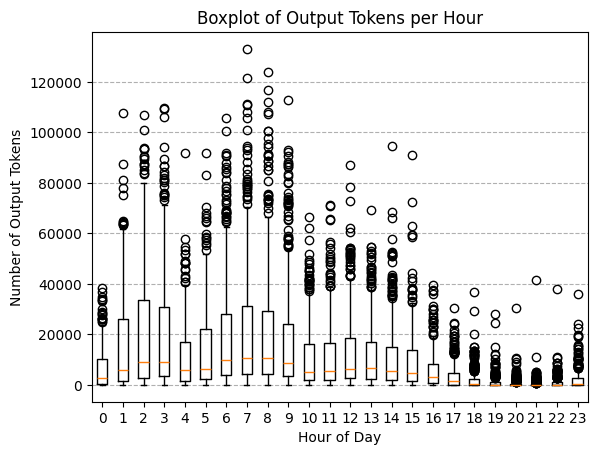

In [147]:
# create boxplot of output tokens per hour
import matplotlib.pyplot as plt
data = []
for hour in range(24):
    output_counts = [output_tokens[day].get(hour, 0) for day in all_days]
    data.append(output_counts)
plt.boxplot(data, positions=range(24))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Output Tokens")
plt.title("Boxplot of Output Tokens per Hour")
plt.grid(True, axis='y', linestyle='--')
plt.show()

***